In [19]:
# 函数部分
import math


def diff(a, b, mode="absolute"):
    '''
    计算绝对误差或相对误差
    '''
    if mode == "absolute":
        return abs(a-b)
    elif mode == "relative":
        return abs((a-b)/b)
    else:
        exit(0)


def my_first_sin(x: float, n=100):
    '''
    取sin(x)的泰勒级数的前n项
    默认 n=100
    '''
    res = 0
    item = x
    for i in range(n+1):
        res += item
        item = item * (-1) * x * x / (2*i+2) / (2*i+3)
    return res


def my_second_sin(x: float):
    '''
    sin(x)的泰勒级数展开
    直到某一项的绝对值小于前n项和的绝对值的 10^(-7)
    '''
    res = 0
    n = 1
    item = x
    while (abs(item) > 10**(-7) * abs(res)):
        res += item
        n += 1
        item = item * (-1) * x * x / (2*n-1) / (2*n-2)
    return res


def my_third_sin(x: float):
    '''
    sin(x)的泰勒级数展开 两项组合计算
    直到 某一组合项的绝对值 小于 前n项和的绝对值的 10^(-7)
    '''
    res = 0
    n = 2
    item_1 = x
    item_2 = (-1) * x * x * x / 2 / 3
    while True:
        combination_item = item_1 + item_2
        if (abs(combination_item) < 10**(-7) * abs(res)):
            break
        res += combination_item
        n += 1
        item_1 = item_2 * (-1) * x * x / (2*n-1) / (2*n-2)
        n += 1
        item_2 = item_1 * (-1) * x * x / (2*n-1) / (2*n-2)
    return res


def my_forth_sin(x: float, num=100):
    '''
    考虑x较大时的误差 缩小x的范围
    sin(x)的泰勒级数展开两项 组合计算
    直到 某一组合项的绝对值 小于前n项和的绝对值的 10^(-7)
    '''
    x = x % (2*math.pi)  # 缩小abs(x)到0附近

    res = 0
    n = 2
    item_1 = x
    item_2 = (-1) * x * x * x / 2 / 3
    while (n < num):
        combination_item = item_1 + item_2
        res += combination_item
        n += 1
        item_1 = item_2 * (-1) * x * x / (2*n-1) / (2*n-2)
        n += 1
        item_2 = item_1 * (-1) * x * x / (2*n-1) / (2*n-2)
    return res


x = math.pi * 10 - 0.00001
n = 100

print('               x = %23.20f' % x)
print('     math.sin(x) = %23.20f' % math.sin(x))
print(' my_first_sin(x) = %23.20f, error = %23.20f' % (my_first_sin(x, n), diff(my_first_sin(x), math.sin(x))))
print('my_second_sin(x) = %23.20f, error = %23.20f' % (my_second_sin(x), diff(my_second_sin(x), math.sin(x))))
print(' my_third_sin(x) = %23.20f, error = %23.20f' % (my_third_sin(x), diff(my_third_sin(x), math.sin(x))))
print(' my_forth_sin(x) = %23.20f, error = %23.20f' % (my_forth_sin(x), diff(my_forth_sin(x), math.sin(x))))


               x = 31.41591653589793153856
     math.sin(x) = -0.00001000000000067940
 my_first_sin(x) =  0.00026469823623408579, error =  0.00027469823623476518
my_second_sin(x) =  0.00002731828858631688, error =  0.00003731828858699628
 my_third_sin(x) =  0.00002704832029100275, error =  0.00003704832029168216
 my_forth_sin(x) = -0.00001000000001091478, error =  0.00000000000001023538


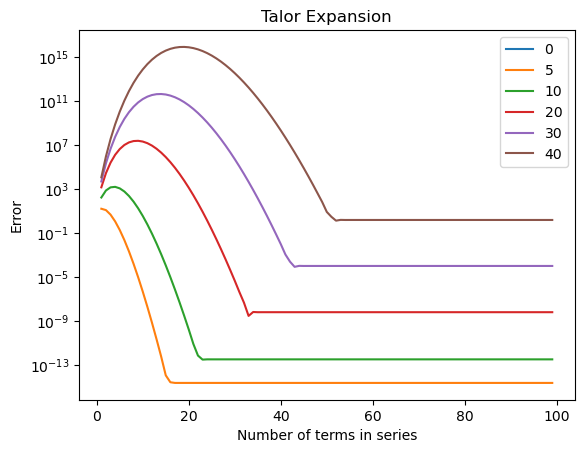

In [20]:
# 绘图部分
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
plt.title("Talor Expansion")
plt.xlabel("Number of terms in series")
plt.ylabel("Error")
# plt.xlim(0, 20)
# plt.xticks(range(1, 10, 100))
plt.yscale("log")


num_of_terms = np.arange(1, 100)
test_x = [0, 5, 10, 20, 30, 40]


for x in test_x:
    error = [diff(my_first_sin(x, n), math.sin(x)) for n in num_of_terms]
    plt.plot(num_of_terms, error)


plt.legend(labels=['0', '5', '10', '20', '30', '40'], loc='best')


plt.show()


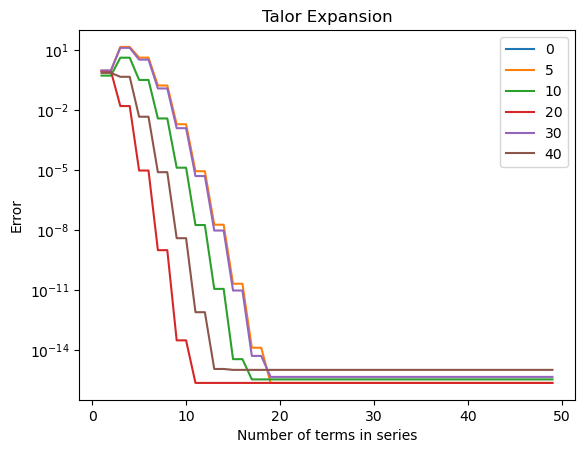

In [21]:
fig = plt.figure()
plt.title("Talor Expansion")
plt.xlabel("Number of terms in series")
plt.ylabel("Error")
# plt.xlim(0, 20)
# plt.xticks()
plt.yscale("log")


num_of_terms = np.arange(1, 50)
test_x = [0, 5, 10, 20, 30, 40]


for x in test_x:
    error = [diff(my_forth_sin(x, n), math.sin(x)) for n in num_of_terms]
    plt.plot(num_of_terms, error)


plt.legend(labels=['0', '5', '10', '20', '30', '40'], loc='best')


plt.show()
